#### Architecture of a CNN
1. Input images - target images we want to discover patterns in
2. Input layer - takes in image shape such as batch size, image height, width, color channels
3. Convolutional layer - extracts/learns the most important features in a image
4. Hidden layer - adds non-linearity to learned features
5. Pooling layer - reduces the dimensionality of learned image features
6. Fully connected layer - further reduces learned features from convolutional layers
7. Output layer - takes learned features and outputs them
8. Output activation - adds non-linearity to output features


In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-08-03 22:28:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  32.6MB/s    in 3.2s    

2023-08-03 22:28:50 (32.6 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [2]:
# Understanding the data
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image=random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (306, 512, 3)


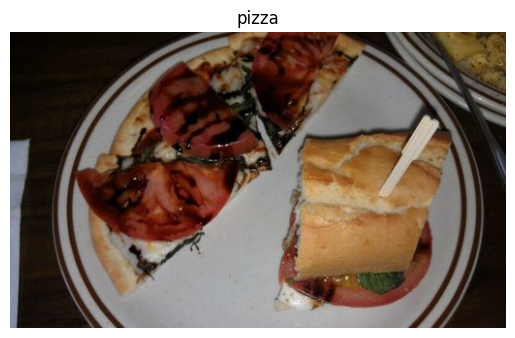

In [7]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class = 'pizza')

In [8]:
img

array([[[  4,   5,   0],
        [  4,   5,   0],
        [  5,   4,   0],
        ...,
        [ 72,  53,  23],
        [ 62,  42,  15],
        [ 48,  28,   1]],

       [[  4,   5,   0],
        [  4,   5,   0],
        [  5,   4,   0],
        ...,
        [ 76,  57,  27],
        [ 78,  58,  31],
        [ 65,  45,  18]],

       [[  4,   5,   0],
        [  4,   5,   0],
        [  5,   4,   0],
        ...,
        [ 76,  55,  24],
        [ 78,  59,  29],
        [ 66,  47,  17]],

       ...,

       [[138, 140, 165],
        [135, 139, 164],
        [135, 139, 164],
        ...,
        [ 22,  13,   6],
        [ 23,  14,   7],
        [ 23,  14,   7]],

       [[138, 140, 163],
        [136, 141, 163],
        [131, 135, 160],
        ...,
        [ 21,  14,   6],
        [ 20,  13,   5],
        [ 20,  13,   5]],

       [[139, 141, 164],
        [136, 141, 163],
        [131, 135, 160],
        ...,
        [ 21,  14,   6],
        [ 20,  13,   5],
        [ 20,  13,   5]]

In [9]:
img.shape

(306, 512, 3)

In [10]:
# Normalize the images(between 0 and 1) For RGB colors the images are between 0 and 255
img/255.

array([[[0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.01568627, 0.        ],
        ...,
        [0.28235294, 0.20784314, 0.09019608],
        [0.24313725, 0.16470588, 0.05882353],
        [0.18823529, 0.10980392, 0.00392157]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.01568627, 0.        ],
        ...,
        [0.29803922, 0.22352941, 0.10588235],
        [0.30588235, 0.22745098, 0.12156863],
        [0.25490196, 0.17647059, 0.07058824]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.01568627, 0.        ],
        ...,
        [0.29803922, 0.21568627, 0.09411765],
        [0.30588235, 0.23137255, 0.11372549],
        [0.25882353, 0.18431373, 0.06666667]],

       ...,

       [[0.54117647, 0.54901961, 0.64705882],
        [0.52941176, 0.54509804, 0.64313725],
        [0.52941176, 0

#### Working with CNN
1. Load the images
2. Preprocess the images
3. Build a CNN to find patterns
4. Compile the CNN
5. Fit the CNN to the target data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess the data(get all pixel values to 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255.)
validation_datagen = ImageDataGenerator(rescale=1./255.)

#setup train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and put them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

validation_data = validation_datagen.flow_from_directory(test_dir,
                                                         batch_size=32,
                                                         target_size=(224, 224),
                                                         class_mode='binary',
                                                         seed=42)

#Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch=len(train_data),
                        validation_data=validation_data,
                        validation_steps=len(validation_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 20s 231ms/step - loss: 0.6545 - accuracy: 0.6187 - val_loss: 0.4442 - val_accuracy: 0.7980
Epoch 2/10
47/47 [==============================] - 6s 133ms/step - loss: 0.4337 - accuracy: 0.7980 - val_loss: 0.3473 - val_accuracy: 0.8580
Epoch 3/10
47/47 [==============================] - 6s 124ms/step - loss: 0.4133 - accuracy: 0.8207 - val_loss: 0.3300 - val_accuracy: 0.8620
Epoch 4/10
47/47 [==============================] - 7s 139ms/step - loss: 0.3601 - accuracy: 0.8447 - val_loss: 0.3035 - val_accuracy: 0.8820
Epoch 5/10
47/47 [==============================] - 6s 120ms/step - loss: 0.3193 - accuracy: 0.8727 - val_loss: 0.2902 - val_accuracy: 0.8900
Epoch 6/10
47/47 [==============================] - 7s 143ms/step - loss: 0.2885 - accuracy: 0.8767 - val_loss: 0.2687 - val_accuracy: 0.8960
Epoch 7/10
47/47 [==============================] - 6s 127ms/ste

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#### Use neural network classification model for the image classification

In [13]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 1.1721 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 152ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Try improving model_2
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 7s 119ms/step - loss: 4.0137 - accuracy: 0.5880 - val_loss: 0.9736 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.9534 - accuracy: 0.7160 - val_loss: 0.7615 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.9541 - accuracy: 0.7147 - val_loss: 0.6831 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.5915 - accuracy: 0.7607 - val_loss: 0.6922 - val_accuracy: 0.7000
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.8292 - accuracy: 0.7020 - val_loss: 0.9443 - val_accuracy: 0.6760


In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The CNN works so much better than the neural network classification.

### Working step by step with the CNN

Image shape: (384, 512, 3)
Image shape: (384, 512, 3)


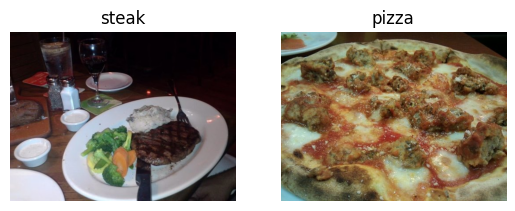

In [17]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

In [18]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [20]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
images, labels=train_data.next()

In [22]:
images

array([[[[0.08627451, 0.04313726, 0.05882353],
         [0.1137255 , 0.06666667, 0.07450981],
         [0.14901961, 0.09019608, 0.07843138],
         ...,
         [0.0509804 , 0.02745098, 0.03529412],
         [0.0509804 , 0.02745098, 0.03529412],
         [0.0509804 , 0.02745098, 0.03529412]],

        [[0.1254902 , 0.09019608, 0.05490196],
         [0.16862746, 0.11764707, 0.08627451],
         [0.22352943, 0.15686275, 0.1254902 ],
         ...,
         [0.0509804 , 0.02745098, 0.03529412],
         [0.0509804 , 0.02745098, 0.03529412],
         [0.0509804 , 0.02745098, 0.03529412]],

        [[0.13725491, 0.10196079, 0.04313726],
         [0.18039216, 0.1254902 , 0.07450981],
         [0.227451  , 0.16470589, 0.10588236],
         ...,
         [0.05882353, 0.02352941, 0.03529412],
         [0.05882353, 0.02352941, 0.03529412],
         [0.05882353, 0.02352941, 0.03529412]],

        ...,

        [[0.9490197 , 0.9607844 , 0.8941177 ],
         [0.9921569 , 1.        , 0.9490197 ]

In [23]:
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [24]:
len(images), len(labels)

(32, 32)

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [26]:
from keras.layers.attention.multi_head_attention import activation
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

1. Filters - decides how many filters should pass over an input tensor. eg- 10, 32, 64, 128
2. Kernel size - decides the shape of filters over the output. eg - 3, 5, 7
3. Padding - pads the target tensors with zeros. eg - same or valid
4. Strides - the number of steps filter takes across an image at a time


In [27]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [28]:
history_4=model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 [==============================] - 9s 140ms/step - loss: 0.8564 - accuracy: 0.6913 - val_loss: 0.4064 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4215 - accuracy: 0.8187 - val_loss: 0.3754 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 6s 122ms/step - loss: 0.2845 - accuracy: 0.8947 - val_loss: 0.3539 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.1505 - accuracy: 0.9547 - val_loss: 0.3552 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.0537 - accuracy: 0.9907 - val_loss: 0.4167 - val_accuracy: 0.8380


In [29]:
import pandas as pd
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.856442,0.691333,0.406429,0.826
1,0.421536,0.818667,0.375446,0.848
2,0.284454,0.894667,0.353899,0.856
3,0.150549,0.954667,0.355235,0.852
4,0.053657,0.990667,0.416720,0.838


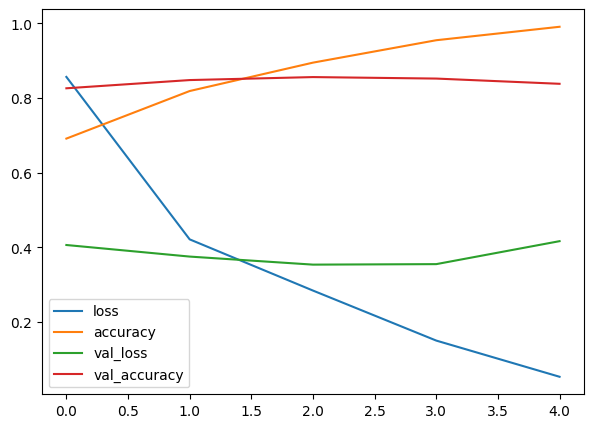

In [30]:
pd.DataFrame(history_4.history).plot(figsize=(7,5));

In [31]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 99ms/step - loss: 0.4167 - accuracy: 0.8380


[0.4167197346687317, 0.8379999995231628]

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [33]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='Training accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


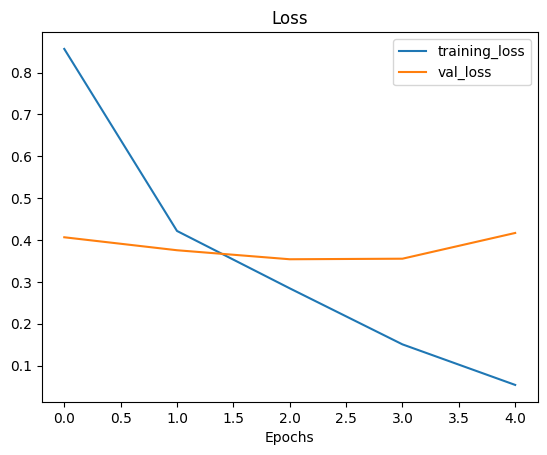

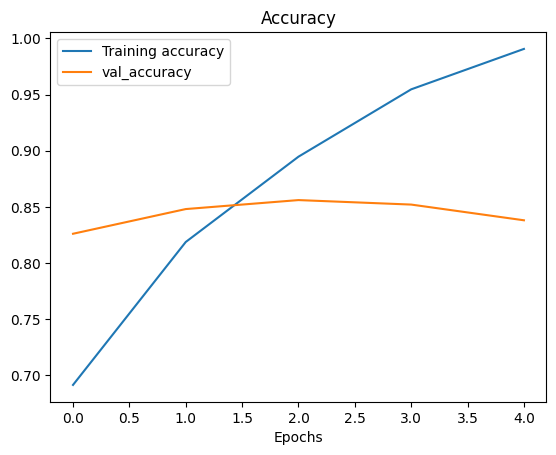

In [34]:
plot_loss_curves(history_4)

When a model's validation loss starts to increase, its likely that the model is overfitting the training data, which means its learning the patterns too well, and thus the model's ability to generalise to unseen data will be diminished.

### Adjust the model parameters.
Fitting a machine learning model comes in 3 steps.
1. Create baseline
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting

### Ways to induce overfitting:
1. Increase th number of conv layers.
2. Increase the number of conv filetrs.
3. Add another dense layer to the output of our flattened layer

### Reduce overfitting
1. Add data augmentation.
2. Add reguralization layers(such as MaxPool2D)

In [35]:
#Create the model.
model_5 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [36]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [37]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps=len(test_data)
            )

Epoch 1/5
47/47 [==============================] - 8s 128ms/step - loss: 0.5950 - accuracy: 0.6913 - val_loss: 0.4326 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4522 - accuracy: 0.8013 - val_loss: 0.3750 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4189 - accuracy: 0.8147 - val_loss: 0.3562 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3822 - accuracy: 0.8387 - val_loss: 0.3458 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3654 - accuracy: 0.8480 - val_loss: 0.3451 - val_accuracy: 0.8700


In [38]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

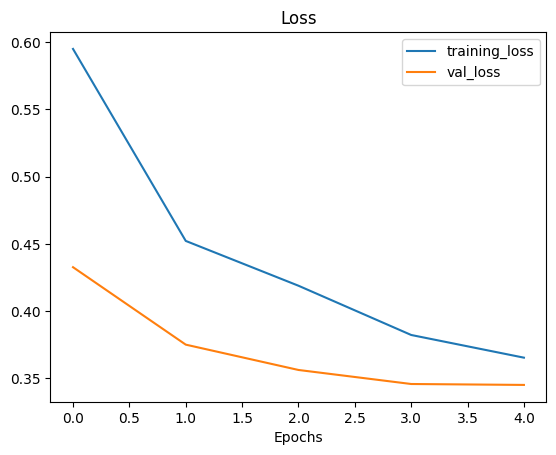

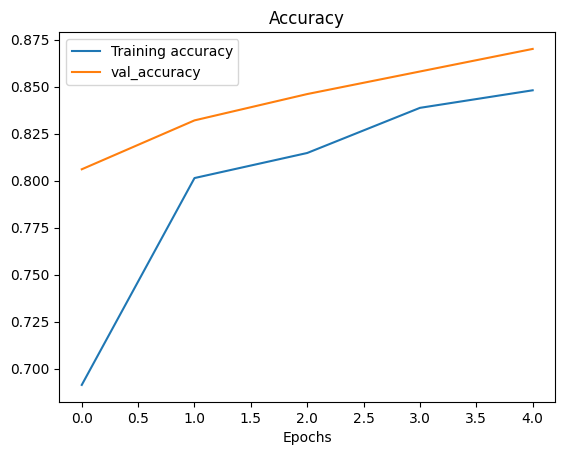

In [39]:
plot_loss_curves(history_5)

Reducing overfitting by augmentation

In [40]:
# With data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True
                                             )
#Without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [41]:
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [42]:
#GEt sample data images
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

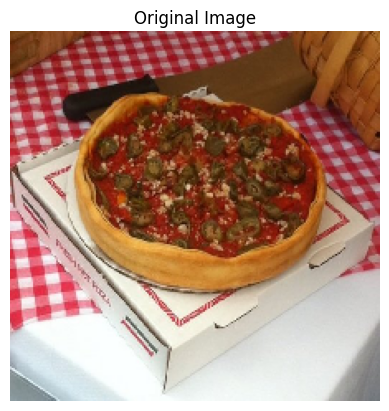

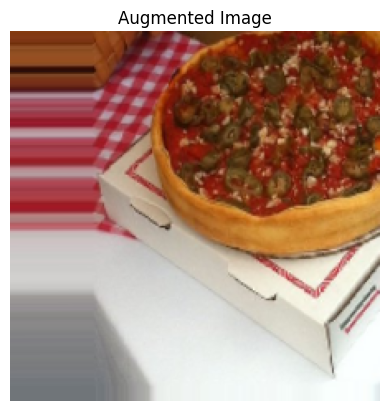

In [43]:
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

In [44]:
model_6 = Sequential([
    Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 435ms/step - loss: 0.7264 - accuracy: 0.4660 - val_loss: 0.6830 - val_accuracy: 0.5100
Epoch 2/5
47/47 [==============================] - 23s 501ms/step - loss: 0.7039 - accuracy: 0.4800 - val_loss: 0.6769 - val_accuracy: 0.5720
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6851 - accuracy: 0.5580 - val_loss: 0.6482 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 20s 436ms/step - loss: 0.6889 - accuracy: 0.6267 - val_loss: 0.6740 - val_accuracy: 0.5300
Epoch 5/5
47/47 [==============================] - 22s 466ms/step - loss: 0.6614 - accuracy: 0.5680 - val_loss: 0.5456 - val_accuracy: 0.7060


In [45]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

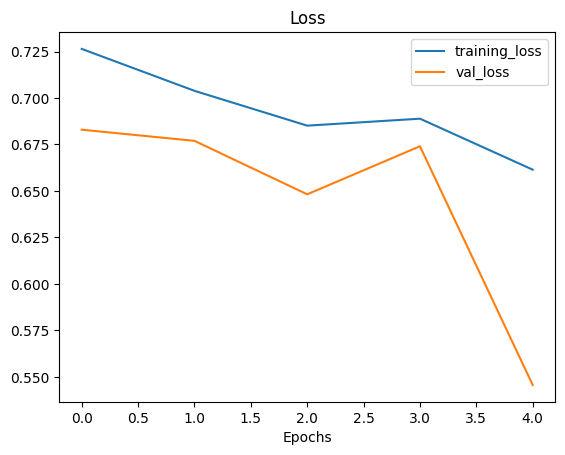

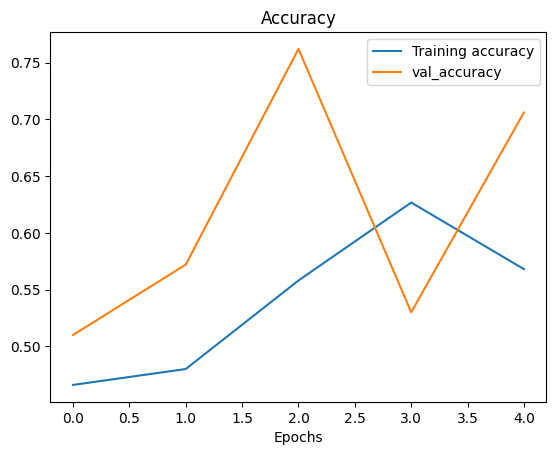

In [46]:
plot_loss_curves(history_6)

In [47]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [48]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 463ms/step - loss: 0.6757 - accuracy: 0.5993 - val_loss: 0.5565 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 22s 451ms/step - loss: 0.5594 - accuracy: 0.7220 - val_loss: 0.4169 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.5298 - accuracy: 0.7427 - val_loss: 0.4618 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 21s 440ms/step - loss: 0.5273 - accuracy: 0.7313 - val_loss: 0.3893 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5046 - accuracy: 0.7627 - val_loss: 0.3813 - val_accuracy: 0.8440


In [49]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 10)      

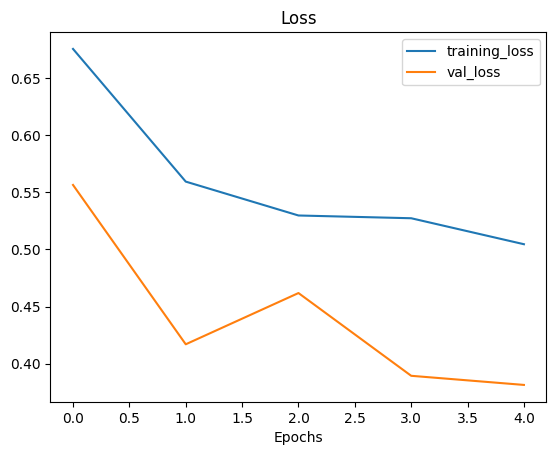

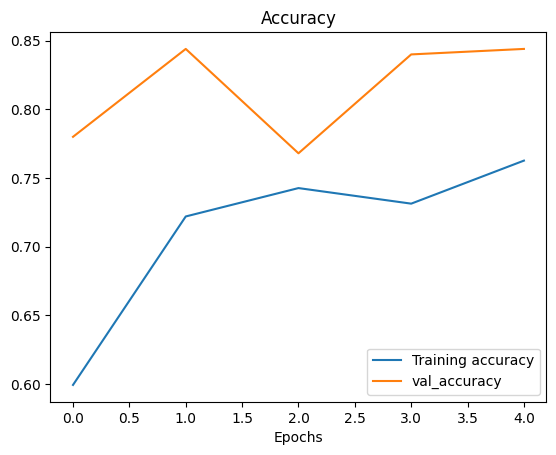

In [50]:
plot_loss_curves(history_7)

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

1. Increase the number of model layers (e.g. add more convolutional layers).
Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
2. Train for longer (more epochs).
3. Finding an ideal learning rate.
4. Get more data (give the model more opportunities to learn).
5. Use transfer learning to leverage what another image model has learned and adjust it for our own use case.

In [51]:
model_8 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 460ms/step - loss: 0.6741 - accuracy: 0.5847 - val_loss: 0.6099 - val_accuracy: 0.5900
Epoch 2/10
47/47 [==============================] - 22s 461ms/step - loss: 0.6446 - accuracy: 0.6400 - val_loss: 0.5669 - val_accuracy: 0.7360
Epoch 3/10
47/47 [==============================] - 22s 464ms/step - loss: 0.6074 - accuracy: 0.6853 - val_loss: 0.4488 - val_accuracy: 0.7980
Epoch 4/10
47/47 [==============================] - 22s 465ms/step - loss: 0.5519 - accuracy: 0.7247 - val_loss: 0.4339 - val_accuracy: 0.8280
Epoch 5/10
47/47 [==============================] - 24s 506ms/step - loss: 0.5094 - accuracy: 0.7587 - val_loss: 0.3706 - val_accuracy: 0.8420
Epoch 6/10
47/47 [==============================] - 21s 447ms/step - loss: 0.4976 - accuracy: 0.7727 - val_loss: 0.3645 - val_accuracy: 0.8360
Epoch 7/10
47/47 [==============================] - 22s 472ms/step - loss: 0.4771 - accuracy: 0.7840 - val_loss: 0.3470 - val_accuracy: 0.8680

In [52]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 10)      2890      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 26, 26, 10)      

In [53]:
pd.DataFrame(history_8.history)

,loss,accuracy,val_loss,val_accuracy
0,0.674101,0.584667,0.609924,0.590
1,0.644575,0.640000,0.566907,0.736
2,0.607415,0.685333,0.448779,0.798
3,0.551856,0.724667,0.433891,0.828
4,0.509375,0.758667,0.370599,0.842
5,0.497630,0.772667,0.364482,0.836
6,0.477141,0.784000,0.347037,0.868
7,0.483773,0.774667,0.371826,0.852
8,0.462001,0.800667,0.438623,0.778
9,0.454893,0.789333,0.362799,0.846


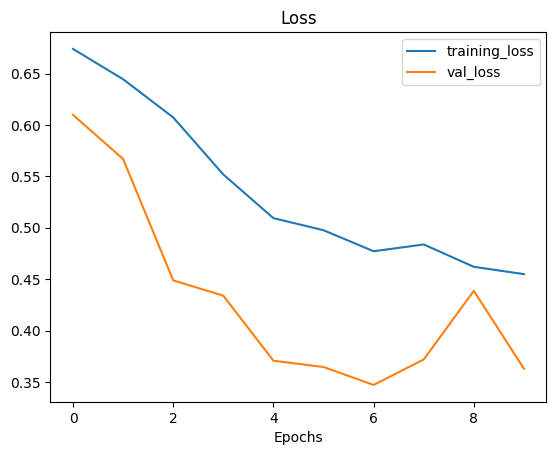

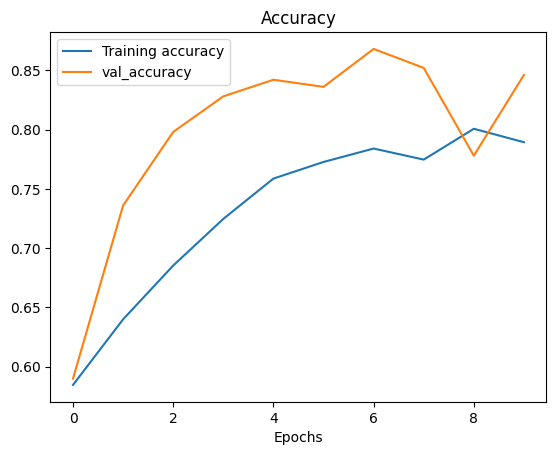

In [54]:
plot_loss_curves(history_8)

### Making a prediction on custom data

--2023-08-03 22:43:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-08-03 22:43:27 (86.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

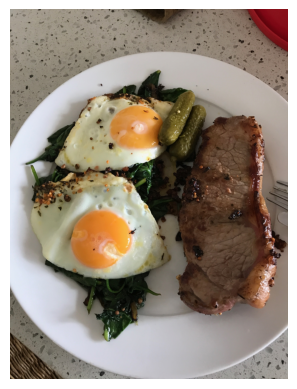

In [55]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [56]:
steak.shape

(4032, 3024, 3)

In [57]:
expanded_steak = tf.expand_dims(steak, axis=0)

Make sure to format your custom data into the same format as your modelled data

In [59]:
# create a function to import an image and resize it to be able to use to predict
def load_and_prep_image(filename, img_shape=224):
  #Read the image
  img= tf.io.read_file(filename)

  #Decode the read file into tensor
  img=tf.image.decode_image(img)

  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  #Rescale the image(between 0 and 1)
  img = img/255.

  return img

In [62]:
steak_updated = load_and_prep_image("03-steak.jpeg")
steak_updated

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [63]:
final_expanded_steak = tf.expand_dims(steak_updated, axis=0)

In [66]:
model_8.predict(final_expanded_steak)

1/1 [==============================] - 0s 51ms/step


array([[0.80653614]], dtype=float32)